## EDA датасета по трендам Ютуба и Тиктока 2025
## Выполнила: Топалова Ярославна

### Импорт всех необходимых библиотек

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

### Смотрим на датасет и его размеры

In [3]:
df = pd.read_csv('youtube_shorts_tiktok_trends_2025.csv')
df.head()

,platform,country,region,language,category,hashtag,title_keywords,author_handle,sound_type,music_track,...,traffic_source,is_weekend,row_id,engagement_total,like_rate,dislike_rate,engagement_per_1k,engagement_like_rate,engagement_comment_rate,engagement_share_rate
0,TikTok,Jp,Asia,ja,Gaming,#Lifestyle,Night Routine — College,NextVision,trending,8bit loop,...,External,1,2e681528d17a1fe1986857942536ec27,30317,0.086159,0.004004,120.069,0.086159,0.012555,0.007830
1,TikTok,Se,Europe,sv,Food,#Sports,Morning Routine — College,DailyVlogsDiego,trending,Street vibe,...,Search,0,2e35fa0b2978b9cae635839c1d4e9e74,30577,0.085298,0.002421,113.005,0.085298,0.007850,0.007791
2,TikTok,Za,Africa,en,Art,#Workout,Night Routine — College,BeyondHub,licensed,Gallery pad,...,External,1,0d88a011235a82244995ef52961f9502,503,0.049154,0.001625,68.111,0.049154,0.004469,0.005146
3,TikTok,Kr,Asia,ko,News,#Esports,Best Settings for Fortnite,NextHub,original,Neutral piano,...,Search,1,e15cff7621ed3f9eb9d2c97c841be0f3,7828,0.086257,0.003164,108.156,0.086257,0.011205,0.005292
4,TikTok,Au,Oceania,en,Beauty,#Comedy,When your friend is Beginners,LucasOfficial,licensed,Soft glam loop,...,ForYou,1,d696b4f0a50ea70e7cb5021be7e198ec,1171,0.051441,0.001175,72.400,0.051441,0.004204,0.004142


In [5]:
print(f"Количество строк: {df.shape[0]}")
print(f"Количество столбцов: {df.shape[1]}")

Количество строк: 48079
Количество столбцов: 58


### Первичная структурная проверка

In [11]:
df.info() # общая информация о датасете

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48079 entries, 0 to 48078
Data columns (total 58 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   platform                 48079 non-null  object 
 1   country                  48079 non-null  object 
 2   region                   48079 non-null  object 
 3   language                 48079 non-null  object 
 4   category                 48079 non-null  object 
 5   hashtag                  48079 non-null  object 
 6   title_keywords           48079 non-null  object 
 7   author_handle            48079 non-null  object 
 8   sound_type               48079 non-null  object 
 9   music_track              48079 non-null  object 
 10  week_of_year             48079 non-null  int64  
 11  duration_sec             48079 non-null  int64  
 12  views                    48079 non-null  int64  
 13  likes                    48079 non-null  int64  
 14  comments              

#### Сразу видим, что пропуски отсутствуют

In [13]:
df.dtypes

platform                    object
country                     object
region                      object
language                    object
category                    object
hashtag                     object
title_keywords              object
author_handle               object
sound_type                  object
music_track                 object
week_of_year                 int64
duration_sec                 int64
views                        int64
likes                        int64
comments                     int64
shares                       int64
saves                        int64
engagement_rate            float64
trend_label                 object
source_hint                 object
notes                       object
device_type                 object
upload_hour                  int64
genre                       object
trend_duration_days          int64
trend_type                  object
engagement_velocity        float64
dislikes                     int64
comment_ratio       

#### Все выглядит логично и соответствующе

### Оценка целостности и полноты данных

In [20]:
df.isna().sum() #убедимся что пропусков нет

platform                   0
country                    0
region                     0
language                   0
category                   0
hashtag                    0
title_keywords             0
author_handle              0
sound_type                 0
music_track                0
week_of_year               0
duration_sec               0
views                      0
likes                      0
comments                   0
shares                     0
saves                      0
engagement_rate            0
trend_label                0
source_hint                0
notes                      0
device_type                0
upload_hour                0
genre                      0
trend_duration_days        0
trend_type                 0
engagement_velocity        0
dislikes                   0
comment_ratio              0
share_rate                 0
save_rate                  0
like_dislike_ratio         0
publish_dayofweek          0
publish_period             0
event_season  

In [30]:
df.duplicated().sum() # дубликатов тоже нет

0

In [32]:
df['row_id'].is_unique # проверка уникальности значений

True

#### Получился очень чистенький датасет

### Оценка выбросов и анломалий

In [40]:
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist() #числовые столбцы
print(f"Числовые столбцы для анализа: {numeric_columns}")

Числовые столбцы для анализа: ['week_of_year', 'duration_sec', 'views', 'likes', 'comments', 'shares', 'saves', 'engagement_rate', 'upload_hour', 'trend_duration_days', 'engagement_velocity', 'dislikes', 'comment_ratio', 'share_rate', 'save_rate', 'like_dislike_ratio', 'creator_avg_views', 'title_length', 'has_emoji', 'avg_watch_time_sec', 'completion_rate', 'is_weekend', 'engagement_total', 'like_rate', 'dislike_rate', 'engagement_per_1k', 'engagement_like_rate', 'engagement_comment_rate', 'engagement_share_rate']


In [52]:
if numeric_columns: # базовая статистика для числовых столбцов
    print(df[numeric_columns].describe())

       week_of_year  duration_sec         views          likes      comments  \
count  48079.000000  48079.000000  4.807900e+04   48079.000000  48079.000000   
mean      18.234260     34.489320  9.929276e+04    5737.732108    628.657314   
std        9.996924     16.401608  1.318522e+05    8639.923653    967.782704   
min        1.000000      5.000000  7.940000e+02      33.000000      3.000000   
25%       10.000000     22.000000  3.032250e+04    1526.000000    160.000000   
50%       18.000000     31.000000  5.962000e+04    3167.000000    339.000000   
75%       27.000000     43.000000  1.180945e+05    6618.000000    720.000000   
max       35.000000     90.000000  3.080686e+06  310916.000000  31776.000000   

             shares         saves  engagement_rate   upload_hour  \
count  48079.000000  48079.000000     48079.000000  48079.000000   
mean     553.484494    591.071487         0.075415     15.986751   
std      849.436172    978.280616         0.030091      5.489399   
min    

### Проверка выбросов методом IQR

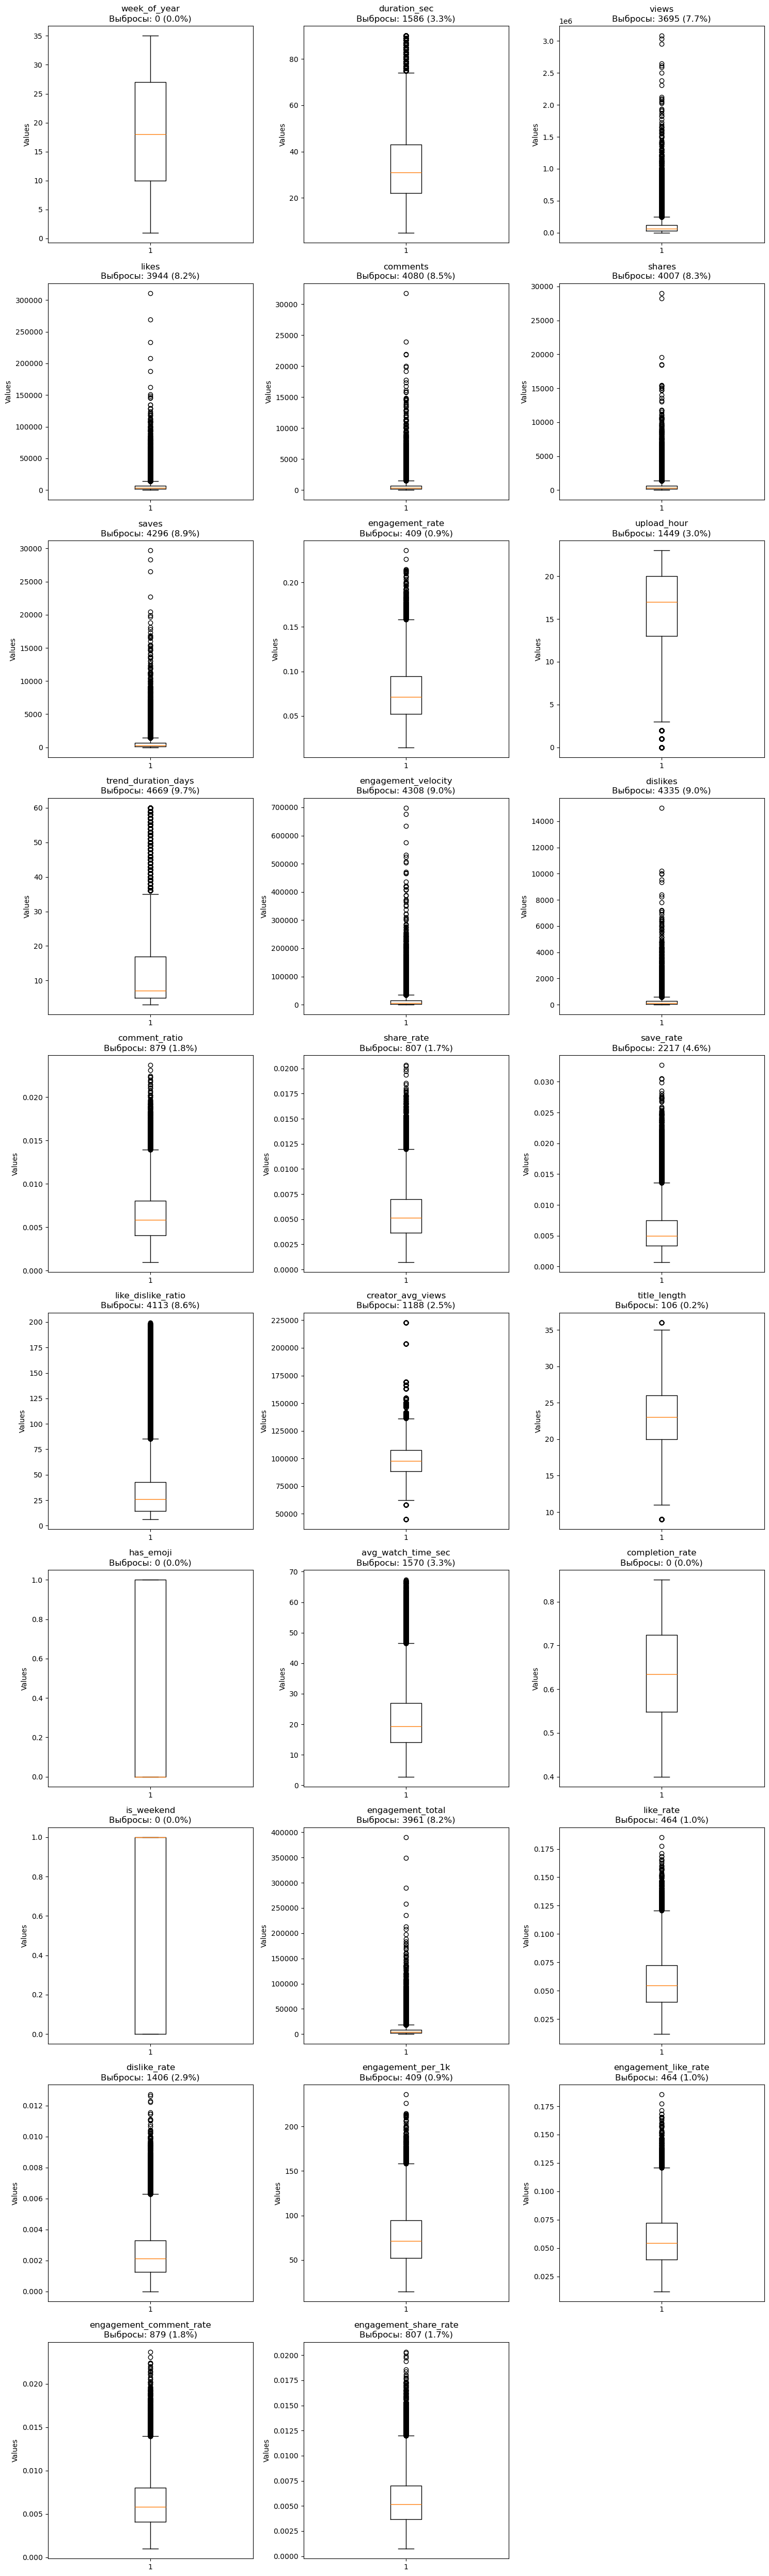

In [50]:
if numeric_columns:
    # Определяем размер сетки для subplots
    n_cols = 3
    n_rows = (len(numeric_columns) + n_cols - 1) // n_cols
    
    # Создаем subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
    
    # Если только одна строка, преобразуем axes в массив для удобства
    if n_rows == 1:
        axes = [axes]
    
    # Строим boxplot для каждого числового признака
    for i, col in enumerate(numeric_columns):
        row_idx = i // n_cols
        col_idx = i % n_cols
        
        # Рассчитываем выбросы
        data = df[col].dropna()
        Q1 = data.quantile(0.25)
        Q3 = data.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = data[(data < lower_bound) | (data > upper_bound)]
        outlier_count = len(outliers)
        outlier_percentage = (outlier_count / len(data)) * 100
        
        # Boxplot
        axes[row_idx][col_idx].boxplot(data)
        axes[row_idx][col_idx].set_title(f'{col}\nВыбросы: {outlier_count} ({outlier_percentage:.1f}%)')
        axes[row_idx][col_idx].set_ylabel('Values')
    
    # Скрываем пустые subplots
    for i in range(len(numeric_columns), n_rows * n_cols):
        row_idx = i // n_cols
        col_idx = i % n_cols
        axes[row_idx][col_idx].set_visible(False)
    
    plt.tight_layout()
    plt.show()

#### Сначала я решила, что удалю выбросы, так как в каждом признаке их не более 10%, но потом всмотрелась в значения, которые опредлены как выбросы. И на самом деле это могут быть вполне реальные значения в контексте социальных сетей:  
#### - тренды, которые популярные на протежяении 60 дней  
#### - несколько миллионов просмотров или лайков и тд  
#### Поэтому я решила, что выбросы удалять не стоит

### Проверка выбросов методом z-score

In [60]:
if numeric_columns:
    
    for col in numeric_columns:
        z_scores = stats.zscore(df[col].dropna())
        outliers_z = np.abs(z_scores) > 3
        outlier_count_z = outliers_z.sum()
        outlier_percentage_z = (outlier_count_z / len(df[col].dropna())) * 100
        
        print(f"Столбец '{col}': {outlier_count_z} выбросов ({outlier_percentage_z:.2f}%)")

Столбец 'week_of_year': 0 выбросов (0.00%)
Столбец 'duration_sec': 692 выбросов (1.44%)
Столбец 'views': 858 выбросов (1.78%)
Столбец 'likes': 811 выбросов (1.69%)
Столбец 'comments': 842 выбросов (1.75%)
Столбец 'shares': 823 выбросов (1.71%)
Столбец 'saves': 835 выбросов (1.74%)
Столбец 'engagement_rate': 253 выбросов (0.53%)
Столбец 'upload_hour': 0 выбросов (0.00%)
Столбец 'trend_duration_days': 1339 выбросов (2.78%)
Столбец 'engagement_velocity': 828 выбросов (1.72%)
Столбец 'dislikes': 863 выбросов (1.79%)
Столбец 'comment_ratio': 445 выбросов (0.93%)
Столбец 'share_rate': 407 выбросов (0.85%)
Столбец 'save_rate': 801 выбросов (1.67%)
Столбец 'like_dislike_ratio': 1342 выбросов (2.79%)
Столбец 'creator_avg_views': 528 выбросов (1.10%)
Столбец 'title_length': 96 выбросов (0.20%)
Столбец 'has_emoji': 0 выбросов (0.00%)
Столбец 'avg_watch_time_sec': 695 выбросов (1.45%)
Столбец 'completion_rate': 0 выбросов (0.00%)
Столбец 'is_weekend': 0 выбросов (0.00%)
Столбец 'engagement_total':

In [83]:
from scipy.stats import shapiro, normaltest
results = []

for col in numeric_columns:
    data = df[col].dropna()
    
    stat_normtest, p_normtest = normaltest(data)
    
    results.append({
        "Признак": col,
        "D'Agostino p-value": round(p_normtest, 4),
        "Нормальное? (D'Agostino)": "Да" if p_normtest > 0.05 else "Нет"
    })

results_df = pd.DataFrame(results)
print(results_df)

                    Признак  D'Agostino p-value Нормальное? (D'Agostino)
0              week_of_year                 0.0                      Нет
1              duration_sec                 0.0                      Нет
2                     views                 0.0                      Нет
3                     likes                 0.0                      Нет
4                  comments                 0.0                      Нет
5                    shares                 0.0                      Нет
6                     saves                 0.0                      Нет
7           engagement_rate                 0.0                      Нет
8               upload_hour                 0.0                      Нет
9       trend_duration_days                 0.0                      Нет
10      engagement_velocity                 0.0                      Нет
11                 dislikes                 0.0                      Нет
12            comment_ratio                 0.0    

#### Метод z-score показал меньшее количество выбросов, но этот метод подходит для данных с нормальным распределением, поэтому я проверила все числовые признаки на нормальность. Оказалось, что данные не распределены нормально, поэтому к ним применим метод IQR

### Метрики качества данных

In [99]:
# полнота данных
completeness = (1 - (df.isna().sum() / len(df))) 
print(f'Полнота данных {completeness.mean()}')

# уникальность записей 
uniqueness = df['row_id'].nunique() / len(df)
print(f'Уникальность записей {uniqueness}')



Полнота данных 1.0
Уникальность записей 1.0
